# Trabajo final

## Alumnos que han participado en esta prática:
- Javier Garzón Martínez
- Alejandra Lorenzana Enrique
- Alejandro Monteliu López
- Carlos David Pujols Brito

## Planteamiento de hipótesis

- La hipótesis nula, denominada H0, sería que no existe una relación significativa entre el nivel de estudios de los padres y el éxito académico de sus hijos. 

- La hipótesis alternativa, denotada como H1, sería que existe una relación significativa entre el nivel de estudios de los padres y el éxito académico de sus hijos.

## Uso de librerías

In [600]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import pydot
import io
import seaborn as sb
import warnings
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore", category=UserWarning)

## 1. Selección de los datos

- Tipos de datos que vamos a usar

    - Este conjunto de datos contiene información de una institución de educación superior sobre varias variables relacionadas con estudiantes universitarios, incluyendo datos demográficos, factores socioeconómicos y desempeño académico, para investigar el impacto de estos factores en el abandono de los estudios y el éxito académico de los estudiantes.

- Fuentes
    - https://www.kaggle.com/code/subhajeetdas/student-dropout-prediction

## 2. Prepocesamiento de datos

### 2.1 Lectura y organización de los datos

In [601]:
datos = pd.read_csv("dataset.csv")

datos = datos.drop_duplicates()
datos = datos.dropna()

# Suprimimos los datos de los estudiantes matriculados actualmente ya que esa información no nos es relevante
datos = datos[datos['Target'] != 'Enrolled']
datos

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Para este caso en particular, nos interesa saber solo si el resultado de los estudiantes has sido graduarse o dejar la carrera, por lo que eliminamos todos los datos de aquellos que por el momento están matriculados.

### 2.2 Estructura del dataset

- Estado académico de los usuarios del dataset

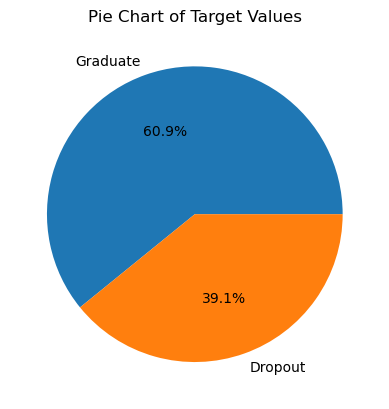

In [602]:
# calcular la frecuencia de cada valor
value_counts = datos["Target"].value_counts()

# crear un gráfico circular con los porcentajes
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# agregar título
plt.title("Pie Chart of Target Values")

# mostrar el gráfico
plt.show()

- Número de hombres y mujeres en la muestra

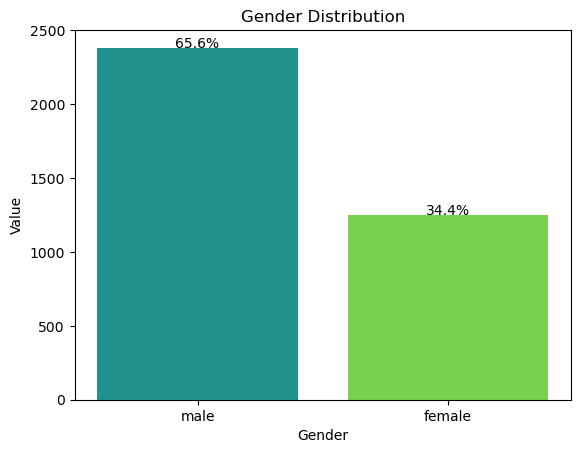

In [603]:
# Datos
values = datos["Gender"].value_counts()
labels = ['male', 'female']

# Calcular porcentajes
total = sum(values)
percentages = [100 * value / total for value in values]

# Crear gráfico de barras
plt.bar(labels, values, color = cm.viridis([0.5, 0.8]))

# Añadir porcentajes en cada columna
for i, value in enumerate(values):
    plt.text(i, value + 0.1, f'{percentages[i]:.1f}%', ha='center')

# Añadir título y etiquetas de eje
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Value')

# Mostrar gráfico
plt.show()


## 3. Transformación de los datos

- Tratamiento preliminar de los datos

    - Para poder trabajar correctamente con apriori y con el árbol de decisión ha sido necesario volver a pasar los datos de las columnas de numéricos a categóricos. Esto nos ha servido para mejorar la calidad de los datos y adaprtalos a los algoritmos.

A continuación se encuentran colapsadas las celdas usadas para ello. Se han decidido colpasar ya que ocupan bastante espacio y cortan el flujo de información según se va avanzando por el notebook.

In [604]:
data = datos.copy()

In [605]:
dic={
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}
data['Marital status'] = data['Marital status'].replace(dic)



In [606]:
dic = {
    1: 'Portuguese',
    2: 'German',
    3: 'Spanish',
    4: 'Italian',
    5: 'Dutch',
    6: 'English',
    7: 'Lithuanian',
    8: 'Angolan',
    9: 'Cape Verdean',
    10: 'Guinean',
    11: 'Mozambican',
    12: 'Santomean',
    13: 'Turkish',
    14: 'Brazilian',
    15: 'Romanian',
    16: 'Moldova (Republic of)',
    17: 'Mexican',
    18: 'Ukrainian',
    19: 'Russian',
    20: 'Cuban',
    21: 'Colombian'
}

data['Nacionality'] = data['Nacionality'].replace(dic)

In [607]:
dic={
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    3: '1st phase - special contingent (Azores Island)',
    4: 'Holders of other higher courses',
    5: 'Ordinance No. 854-B/99',
    6: 'International student (bachelor)',
    7: '1st phase - special contingent (Madeira Island)',
    8: '2nd phase - general contingent',
    9: '3rd phase - general contingent',
    10: 'Ordinance No. 533-A/99, item b2 (Different Plan)',
    11: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    12: 'Over 23 years old',
    13: 'Transfer',
    14: 'Change in course',
    15: 'Technological specialization diploma holders',
    16: 'Change in institution/course',
    17: 'Short cycle diploma holders',
    18: 'Change in institution/course (International)'
}

data['Application mode'] = data['Application mode'].replace(dic)


In [608]:
dic = {
    1: 'Biofuel Production Technologies',
    2: 'Animation and Multimedia Design',
    3: 'Social Service (evening attendance)',
    4: 'Agronomy',
    5: 'Communication Design',
    6: 'Veterinary Nursing',
    7: 'Informatics Engineering',
    8: 'Equiniculture',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism',
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing Management',
    15: 'Journalism and Communication',
    16: 'Basic Education',
    17: 'Management (evening attendance)'
}

data['Course'] = data['Course'].replace(dic)

In [609]:
dic = {
    1: 'Secondary education',
    2: 'Higher education—bachelor’s degree',
    3: 'Higher education—degree',
    4: 'Higher education—master’s degree',
    5: 'Higher education—doctorate',
    6: 'Frequency of higher education',
    7: '12th year of schooling—not completed',
    8: '11th year of schooling—not completed',
    9: 'Other—11th year of schooling',
    10: '10th year of schooling',
    11: '10th year of schooling—not completed',
    12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
    13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent',
    14: 'Technological specialization course',
    15: 'Higher education—degree (1st cycle)',
    16: 'Professional higher technical course',
    17: 'Higher education—master’s degree (2nd cycle)'
}

data['Previous qualification'] = data['Previous qualification'].replace(dic)

In [610]:
dic = {
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor’s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master’s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic Education 1st Cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher Education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master’s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
}

data["Mother's qualification"] = data["Mother's qualification"].replace(dic)
data["Father's qualification"] = data["Father's qualification"].replace(dic)

In [611]:
dic = {
    1: "Student",
    2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    3: "Specialists in Intellectual and Scientific Activities",
    4: "Intermediate Level Technicians and Professions",
    5: "Administrative staff",
    6: "Personal Services, Security and Safety Workers, and Sellers",
    7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    8: "Skilled Workers in Industry, Construction, and Craftsmen",
    9: "Installation and Machine Operators and Assembly Workers",
    10: "Unskilled Workers",
    11: "Armed Forces Professions",
    12: "Other Situation",
    13: "(blank)",
    14: "Armed Forces Officers",
    15: "Armed Forces Sergeants",
    16: "Other Armed Forces personnel",
    17: "Directors of administrative and commercial services",
    18: "Hotel, catering, trade, and other services directors",
    19: "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    20: "Health professionals",
    21: "Teachers",
    22: "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    23: "Intermediate level science and engineering technicians and professions",
    24: "Technicians and professionals of intermediate level of health",
    25: "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    26: "Information and communication technology technicians",
    27: "Office workers, secretaries in general, and data processing operators",
    28: "Data, accounting, statistical, financial services, and registry-related operators",
    29: "Other administrative support staff",
    30: "Personal service workers",
    31: "Sellers",
    32: "Personal care workers and the like",
    33: "Protection and security services personnel",
    34: "Market-oriented farmers and skilled agricultural and animal production workers",
    35: "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    36: "Skilled construction workers and the like, except electricians",
    37: "Skilled workers in metallurgy, metalworking, and similar",
    38: "Skilled workers in electricity and electronics",
    39: "Workers in food processing, woodworking, and clothing and other industries and crafts",
    40: "Fixed plant and machine operators",
    41: "Assembly workers",
    42: "Vehicle drivers and mobile equipment operators",
    43: "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    44: "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    45: "Meal preparation assistants",
    46: "Street vendors (except food) and street service providers"
}

data["Mother's occupation"] = data["Mother's occupation"].replace(dic)
data["Father's occupation"] = data["Father's occupation"].replace(dic)

In [612]:
dic = {
    1: 'male',
    0: 'female'
}

data['Gender'] = data['Gender'].replace(dic)

In [613]:
dic = {
    1: 'daytime',
    0: 'evening'
}

data['Daytime/evening attendance'] = data['Daytime/evening attendance'].replace(dic)

In [614]:
dic={
    1: 'yes',
    0: 'no'
}

data['Displaced'] = data['Displaced'].replace(dic)
data['Educational special needs'] = data['Educational special needs'].replace(dic)
data['Debtor'] = data['Debtor'].replace(dic)
data['Tuition fees up to date'] = data['Tuition fees up to date'].replace(dic)
data['Scholarship holder'] = data['Scholarship holder'].replace(dic)
data['International'] = data['International'].replace(dic)


In [615]:
contingencia = datos.copy()

In [616]:
# Selecionamos las variables que nos parecen más relevantes para realizar el algoritmo Apriori
apriori = data.copy()
apriori = apriori[["Mother's qualification", "Father's qualification", "Target"]]

# Añadimos un _f al final de los estudios en la columna de los padres y un _m en la columna de las madres para poder diferenciarlos a la hora de sacar las reglas
apriori.loc[:, "Father's qualification"] = apriori["Father's qualification"].apply(lambda x: x + '_f')
apriori.loc[:, "Mother's qualification"] = apriori["Mother's qualification"].apply(lambda x: x + '_m')

In [617]:
# Selecionamos las variables para hacer el árbol
arbol = data.copy()
arbol = arbol[["Mother's qualification", "Father's qualification", "Target"]]

In [618]:
bayes = datos.copy()
bayes = bayes[["Mother's qualification", "Father's qualification", "Target"]]

In [619]:
dic = {
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor’s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master’s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic Education 1st Cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher Education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master’s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
}

dic_ordenado = {
    1: 'Unknown',
    2: 'Cannot read or write',
    3: 'Can read without having a 4th year of schooling',
    4: 'Basic Education 1st Cycle (4th/5th year) or equivalent',
    5: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    6: '7th year of schooling',
    7: '7th Year (Old)',
    8: '8th year of schooling',
    9: '9th Year of Schooling—not completed',
    10: '2nd cycle of the general high school course',
    11: '10th Year of Schooling',
    12: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    13: '12th Year of Schooling—not completed',
    14: '2nd year complementary high school course',
    15: '11th Year of Schooling—not completed',
    16: 'Other—11th Year of Schooling',
    17: 'Complementary High School Course',
    18: 'Complementary High School Course—not concluded',
    19: 'Secondary Education—12th Year of Schooling or Equivalent',
    20: 'General commerce course',
    21: 'General Course of Administration and Commerce',
    22: 'Supplementary Accounting and Administration',
    23: 'Technical-professional course',
    24: 'Technological specialization course',
    25: 'Frequency of Higher Education',
    26: 'Higher Education—degree (1st cycle)',
    27: 'Higher Education—bachelor’s degree',
    28: 'Higher Education—degree',
    29: 'Higher Education—master’s degree',
    30: 'Higher Education—master’s degree (2nd cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—doctorate',
    34: 'Higher Education—doctorate (3rd cycle)'
}

dic_change = {}

for num, value in dic.items():
    index = list(dic_ordenado.values()).index(value)
    dic_change[num] = index + 1

bayes["Mother's qualification"] = bayes["Mother's qualification"].replace(dic_change)
bayes["Father's qualification"] = bayes["Father's qualification"].replace(dic_change)

In [620]:
correlacion = datos.copy()

# Discretizar los datos de la columna Target
dic = {
    "Graduate": 1, 
    "Dropout": 0
}
correlacion["Target"] = correlacion["Target"].map(dic)

## 4. Técnicas de Data Mining

### 4.1 Tablas de contingencia

Ahora para ver si hay alguna relación usaremos las tablas de contingencia, con el objetivo de identificar un dato dentro de las variables de fathers qualification y mothers cualification que ejerza una gran influencia en la variable target.

### Tabla de contingencias de la variable "Mother qualification" y la variable "Target"

In [621]:
# Cuenta el número de datos por categoría de "Mother's qualification"
counts = contingencia["Mother's qualification"].value_counts()

# Filtra las categorías con al menos 30 datos
valid_categories = counts[counts >= 40].index

# Filtra el dataset para mantener solo las categorías válidas
filtered_contingencia = contingencia[contingencia["Mother's qualification"].isin(valid_categories)]

Para la implementación de esta tabla se ha realizado un filtrado de entre todos los estudios y se han eliminado aquellos de los cuáles no se tengan más de 40 datos. Esto se debe a que en algunos casos, los datos en cuanto a Graduate y Dropout eran de 2  y 0, lo que provocaría que los porcentanjes no reflejasen adecuadamente la distribución de los datos.

In [622]:
# Crea la tabla de contingencia
contingency_table = pd.crosstab(filtered_contingencia["Mother's qualification"], filtered_contingencia['Target'])
print("Tabla de contingencia entre 'Mother's qualification' y 'Target': \n")
print(contingency_table)

Tabla de contingencia entre 'Mother's qualification' y 'Target': 

Target                  Dropout  Graduate
Mother's qualification                   
1                           300       565
2                            20        40
3                           139       198
13                          271       506
19                           96        31
22                          383       457
23                          140       331


La primera tabla muestra la distribución de los datos relacionados con la educación de la madre, aunque no de manera muy clara. En la parte derecha de la tabla, se encuentra el número de estudio de la madre y, a la izquierda, se presentan el número de estudiantes cuyas madres tienen cada tipo de estudios, en función de si han abandonado o se han graduado de la universidad.

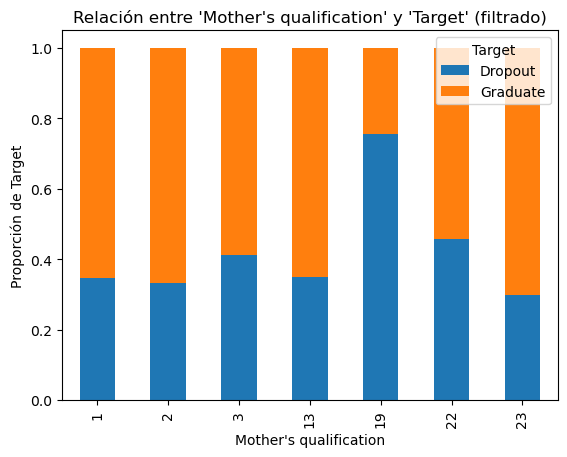

In [623]:
# Normaliza la tabla de contingencia para mostrar porcentajes
normalized_contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crea el gráfico de barras apiladas
ax = normalized_contingency_table.plot.bar(stacked=True)
plt.xlabel("Mother's qualification")
plt.ylabel("Proporción de Target")
plt.title("Relación entre 'Mother's qualification' y 'Target' (filtrado)")
plt.legend(title="Target")
plt.show()

Este gráfico, generado a partir de la tabla anterior, nos da una visión más clara sobre como de dispersos están los datos y si puede llegar a haber una relación muy significativa con algún tipo de educación que tenga la madre. 

A simple vista percibimos que los alumnos cuyas madres han tenido una educación correspondiente al número 19 ("2nd cycle of the general high school course") son los que más tienden a abandonar. A grandes rasgos este es el único caso donde hay mayor número de abandonos que graduados.

### Tabla de contingencias de la variable "Father qualification" y la variable "Target"

In [624]:
# Cuenta el número de datos por categoría de "Father's qualification"
counts = contingencia["Father's qualification"].value_counts()

# Filtra las categorías con al menos 30 datos
valid_categories = counts[counts >= 40].index

# Filtra el dataset para mantener solo las categorías válidas
filtered_contingencia = contingencia[contingencia["Father's qualification"].isin(valid_categories)]

Al igual que con la variable "Mother's qualifcation", para la implementación de esta tabla se ha realizado un filtrado de entre todos los estudios y se han eliminado aquellos estudios de los cuáles no se tengan mas de 40 datos.

In [625]:
# Crea la tabla de contingencia
contingency_table = pd.crosstab(filtered_contingencia["Father's qualification"], filtered_contingencia['Target'])
print("Tabla de contingencia entre 'Father's qualification' y 'Target': \n")
print(contingency_table)

Tabla de contingencia entre 'Father's qualification' y 'Target': 

Target                  Dropout  Graduate
Father's qualification                   
1                           281       451
2                            22        21
3                            90       130
14                          264       521
24                           81        28
27                          432       578
28                          167       408


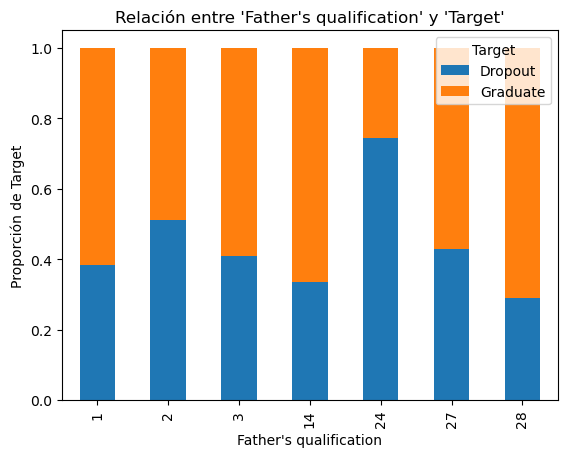

In [626]:
# Normaliza la tabla de contingencia para mostrar porcentajes
normalized_contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crea el gráfico de barras apiladas
ax = normalized_contingency_table.plot.bar(stacked=True)
plt.xlabel("Father's qualification")
plt.ylabel("Proporción de Target")
plt.title("Relación entre 'Father's qualification' y 'Target'")
plt.legend(title="Target")
plt.show()

Este gráfico, generado a partir de la tabla anterior, nos da una visión más clara sobre como de dispersos están los datos y si puede llegar a haber una relación muy significativa con algún tipo de educación que tenga el padre. 

A simple vista percibimos que los alumnos cuyos padres han tenido una educación correspondiente al número 24 ("Unknown") son los que más tienden a abandonar. A grandes rasgos este es el único caso donde hay mayor número de abandonos que graduados, aunque el la proporción de abandonos por estudios del padre es mayor que en la variable "Mother´s qualification".

## 4.2 Algoritmo Apriori

El algoritmo Apriori es un algoritmo utilizado para extraer reglas de asociación a partir de un conjunto de datos. En el caso de datos de educación, este algoritmo podría utilizarse para descubrir qué factores tienen una mayor probabilidad de estar asociados con el éxito académico de los estudiantes, por ejemplo, determinando si hay una relación entre el nivel educativo de los padres y el rendimiento académico de los hijos.

- Generación de las secuencias posibles

In [627]:
transactions = []

my_array = ["Mother's qualification", "Father's qualification", "Target"]

# Convertimos los valores de las columnas en listas, de modo que podamos utilizar la clase TransactionEncoder de mlxtend para convertir los datos en un formato adecuado para el algoritmo Apriori
for _, row in apriori.iterrows():
    transactions.append([str(row[col]) for col in apriori])

# Ordenamos la lista agrupando las diferentes filas correspondientes a los mismos usuarios
sorted_transactions = sorted(transactions, key = lambda x: str(x))

# Pasamos la lista un DataFrame
sorted_transactions_df = pd.DataFrame(sorted_transactions)
sorted_transactions_df.columns = my_array
sorted_transactions_df
 

,Mother's qualification,Father's qualification,Target
0,10th Year of Schooling_m,General commerce course_f,Dropout
1,11th Year of Schooling—not completed_m,11th Year of Schooling—not completed_f,Dropout
2,11th Year of Schooling—not completed_m,Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f,Graduate
3,11th Year of Schooling—not completed_m,Other—11th Year of Schooling_f,Dropout
4,12th Year of Schooling—not completed_m,12th Year of Schooling—not completed_f,Graduate
...,...,...,...
3625,Unknown_m,Higher Education—degree_f,Dropout
3626,Unknown_m,Higher Education—degree_f,Graduate
3627,Unknown_m,Secondary Education—12th Year of Schooling or Equivalent_f,Dropout
3628,Unknown_m,Technological specialization course_f,Dropout


Para este ejercicio utilizaremos como soporte mínimo 0.05

- K = 1

In [628]:
from apyori import apriori
# Obtener los itemsets frecuentes para k=1 con un soporte mínimo del 0.05
frequent_itemsets_k1 = apriori(sorted_transactions, min_support = 0.05, max_length = 1)

# Convertimos el generador en un dataframe
frequent_itemsets_k1_df = pd.DataFrame(frequent_itemsets_k1)
frequent_itemsets_k1_df = frequent_itemsets_k1_df.drop('ordered_statistics', axis=1)

# Mostrar todas los itemsets frecuentes
frequent_itemsets_k1_df

,items,support
0,(Basic Education 1st Cycle (4th/5th year) or equivalent_f),0.278237
1,(Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent_f),0.158402
2,(Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f),0.216253
3,(Dropout),0.391460
4,(General Course of Administration and Commerce_m),0.231405
5,(General commerce course_m),0.214050
6,(Graduate),0.608540
7,(Higher Education—degree_f),0.060606
8,(Higher Education—degree_m),0.092837
9,(Secondary Education—12th Year of Schooling or Equivalent_f),0.201653


- k = 2

In [629]:
# Obtener los itemsets frecuentes para k=2 con un soporte mínimo del 0.05
frequent_itemsets_k2 = apriori(sorted_transactions, min_support = 0.05, max_length = 2, use_colnames=True)

# Convertimos el generador en un dataframe
frequent_itemsets_k2_df = pd.DataFrame(frequent_itemsets_k2, columns=['itemsets', 'support', 'ordered_statistics'])
# 
pd.options.display.max_colwidth = 200

# Eliminamos la columna 'ordered_statistics' ya que no nos interesa mostrarla
frequent_itemsets_k2_df = frequent_itemsets_k2_df.drop('ordered_statistics', axis=1)

# Mostramos solo los datos correspondientes a k = 2, ya que nos aparecían también los de k = 1
frequent_itemsets_k2_df_mostrar = frequent_itemsets_k2_df[frequent_itemsets_k2_df['itemsets'].apply(lambda x: len(x) == 2)]
frequent_itemsets_k2_df_mostrar

,itemsets,support
12,"(Dropout, Basic Education 1st Cycle (4th/5th year) or equivalent_f)",0.119008
13,"(General Course of Administration and Commerce_m, Basic Education 1st Cycle (4th/5th year) or equivalent_f)",0.161983
14,"(Graduate, Basic Education 1st Cycle (4th/5th year) or equivalent_f)",0.159229
15,"(Graduate, Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent_f)",0.112397
16,"(Dropout, Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f)",0.072727
17,"(Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f, General commerce course_m)",0.079890
18,"(Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f, Graduate)",0.143526
19,"(Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f, Secondary Education—12th Year of Schooling or Equivalent_m)",0.062810
20,"(Dropout, General Course of Administration and Commerce_m)",0.105510
21,"(Dropout, General commerce course_m)",0.074656


- k = 3

In [630]:
# Obtenemos los itemsets frecuentes para k=3 con un soporte mínimo del 0.05
frequent_itemsets_k3 = apriori(sorted_transactions, min_support=0.05, min_length = 3, use_colnames=True)

# Convertimos el generador en un dataframe
frequent_itemsets_k3_df = pd.DataFrame(frequent_itemsets_k3, columns=['itemsets', 'support', 'ordered_statistics'])

# Eliminamos la columna 'ordered_statistics' ya que no nos interesa mostrarla
frequent_itemsets_k3_df = frequent_itemsets_k3_df.drop('ordered_statistics', axis=1)

# Mostramos solo los datos correspondientes a k = 3, ya que nos aparecían también los de k = 1 y k = 2
frequent_itemsets_k3_df_mostrar= frequent_itemsets_k3_df[frequent_itemsets_k3_df['itemsets'].apply(lambda x: len(x) == 3)]
frequent_itemsets_k3_df_mostrar

,itemsets,support
31,"(Dropout, Basic Education 1st Cycle (4th/5th year) or equivalent_f, General Course of Administration and Commerce_m)",0.077961
32,"(General Course of Administration and Commerce_m, Graduate, Basic Education 1st Cycle (4th/5th year) or equivalent_f)",0.084022
33,"(Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent_f, Graduate, General commerce course_m)",0.051791
34,"(Graduate, Secondary Education—12th Year of Schooling or Equivalent_f, Secondary Education—12th Year of Schooling or Equivalent_m)",0.058402


In [631]:
# Obtenemos los itemsets frecuentes para k=4 con un soporte mínimo del 0.05
frequent_itemsets_k4 = apriori(sorted_transactions, min_support=0.05, min_length = 4, use_colnames=True)

# Convertimos el generador en un dataframe
frequent_itemsets_k4_df = pd.DataFrame(frequent_itemsets_k4, columns=['itemsets', 'support', 'ordered_statistics'])

# Eliminamos la columna 'ordered_statistics' ya que no nos interesa mostrarla
frequent_itemsets_k4_df = frequent_itemsets_k4_df.drop('ordered_statistics', axis=1)

# Mostramos solo los datos correspondientes a k = 4, ya que nos aparecían también los de k = 1, k = 2 y k = 3
frequent_itemsets_k4_df_mostrar= frequent_itemsets_k4_df[frequent_itemsets_k4_df['itemsets'].apply(lambda x: len(x) == 4)]
frequent_itemsets_k4_df_mostrar

,itemsets,support


Podemos ver que para k = 4 no existen itemsets frecuentes que cumplan el soporte mínimo de 0.05, por lo que sacamos las reglas correspondientes a lo obtenido en k = 3

- Generación de reglas de asociación

In [632]:
# Obtenemos todas las reglas de asociación con alta confianza ( confianza > 0.7)
rules = association_rules(frequent_itemsets_k3_df, metric="confidence", min_threshold=0.7)
frequent_itemsets_aux=frequent_itemsets_k3_df

# Mostrar las reglas de asociación restantes con su confianza
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(General Course of Administration and Commerce_m),(Basic Education 1st Cycle (4th/5th year) or equivalent_f),0.231405,0.278237,0.161983,0.700000,2.515842,0.097598,2.405877
1,(Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent_f),(Graduate),0.158402,0.608540,0.112397,0.709565,1.166013,0.016003,1.347842
2,(Supplementary Accounting and Administration_m),(Graduate),0.129752,0.608540,0.091185,0.702760,1.154830,0.012225,1.316983
3,"(Dropout, General Course of Administration and Commerce_m)",(Basic Education 1st Cycle (4th/5th year) or equivalent_f),0.105510,0.278237,0.077961,0.738903,2.655663,0.048605,2.764353


La métrica de confianza indica la probabilidad condicionada de que el consecuente se realice dado un antecedente. En cuanto a las reglas de asociación, las válidas para la hipótesis son la número uno, la número dos y la número 3.

La primera regla sugiere que si el padre tiene una educación básica de segundo ciclo (sexto, séptimo u octavo año o equivalente), hay un 70% de probabilidad de que el hijo/a se gradúe. 

La segunda regla de asociación indica que si la madre tiene estudios en contabilidad y administración, existe una probabilidad del 70% de que el hijo/a se gradúe.

La tercera regla de asociación sugiere que si el alumno ha abandonado la carrera y su madre tiene un curso general de administración y comercio, existe una probabilidad del 73% de que el padre tenga una educación básica de segundo ciclo (sexto, séptimo u octavo año o equivalente).

Estas reglas no nos aseguran que el  nivel de estudios de los padres sea causa directa que determine la graducación de sus hijos.
Esto se debe a que el primer antecendente(Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent_f) se podría considerar un nivel de estudios bajo y el segundo antecendete(Supplementary Accounting and Administration_m) se podría considerar como nivel de estudios alto y ambos hijos se gradúan.



## 4.3 Arbol de decisión

Hemos escogido hacer un árbol de decisión ya que nos puede ayudar a comprender con una ayuda visual como afectan estas variables sobre la columna Target, columna que nos indica el estado académico de los estudiantes. Al crear un árbol de decisión, se pueden analizar las diferentes variables que pueden influir en una decisión o resultado y cómo interactúan entre sí.

In [633]:
# Separar las columnas categóricas y numéricas
cat_cols = arbol.select_dtypes(include='object').columns
num_cols = arbol.select_dtypes(include=np.number).columns

# Realizar One-Hot Encoding en las columnas categóricas
encoder = OneHotEncoder()
arbol_encoded = pd.get_dummies(arbol, columns=cat_cols)

# Normalizar las columnas numéricas
for col in num_cols:
    arbol_encoded[col] = (arbol_encoded[col] - arbol_encoded[col].mean()) / arbol_encoded[col].std()

# Convertir los datos a binario
arbol_binary = arbol_encoded.applymap(lambda x: 1 if x > 0 else 0)


- División de los datos en los correspondientes datasets

In [634]:
# Separar los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(arbol_binary.drop(['Target_Dropout','Target_Graduate'], axis=1), arbol_binary[['Target_Dropout','Target_Graduate']], test_size=0.2, random_state=42)


In [635]:
train_size = np.shape(X_train)[0]
test_size = np.shape(X_test)[0]

print("Cantidad de datos en conjunto de entrenamiento:", train_size)
print("Cantidad de datos en conjunto de prueba:", test_size)

Cantidad de datos en conjunto de entrenamiento: 2904
Cantidad de datos en conjunto de prueba: 726


Text(0.5, 1.0, 'Distribución de datos en conjunto de entrenamiento y prueba')

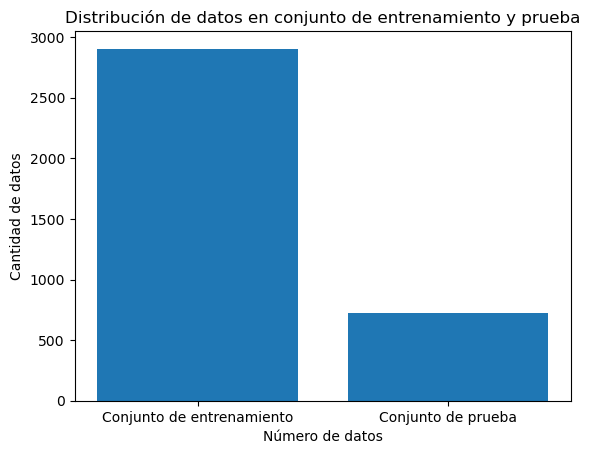

In [636]:
# Crear una lista con la cantidad de datos en cada conjunto
data_sizes = [train_size, test_size]

# Crear una figura con un gráfico de barras
fig, ax = plt.subplots()
ax.bar(['Conjunto de entrenamiento', 'Conjunto de prueba'], data_sizes)

# Agregar etiquetas y título
ax.set_xlabel('Número de datos')
ax.set_ylabel('Cantidad de datos')
ax.set_title('Distribución de datos en conjunto de entrenamiento y prueba')

In [637]:
# Ajustar el modelo solo para Venenosa_e
clf_Dropout = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
clf_Dropout.fit(X_train, y_train['Target_Dropout'])

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [638]:
# Hacer predicciones para Venenosa_e en los datos de prueba
preds_Dropout = clf_Dropout.predict(X_test)

# Reporte de clasificación para "Venenosa_e"
print("Árbol de decisión para Target_Dropout: \n" 
      + classification_report(y_true=y_test['Target_Dropout'], y_pred=preds_Dropout))

Árbol de decisión para Target_Dropout: 
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       449
           1       0.68      0.05      0.09       277

    accuracy                           0.63       726
   macro avg       0.66      0.52      0.43       726
weighted avg       0.65      0.63      0.51       726



In [639]:
# Matriz de confusión para "Venenosa_e"
print("Matriz de confusión para Target_Dropout:")
matriz_Dropout = pd.crosstab(y_test['Target_Dropout'], preds_Dropout, rownames=['actual'], colnames=['preds'])
print(matriz_Dropout)

Matriz de confusión para Target_Dropout:
preds     0   1
actual         
0       443   6
1       264  13


- Precisión del modelo

In [640]:
precision_Dropout = precision_score(y_test['Target_Dropout'], preds_Dropout)
print(f"Precisión para Target_Dropout: {precision_Dropout:.2f}")

Precisión para Target_Dropout: 0.68


- Error del modelo

In [641]:
y_test_i = y_test.iloc[:, i]

# Calcular el error de entrenamiento
train_error = mean_squared_error(y_test_i, preds_Dropout)
print(f"Error para preds_Dropout: {train_error:.2f}")

Error para preds_Dropout: 0.63


Como podemos apreciar, obtenemos una precisión relativamente baja y un error considerablemente alto para este clasificador con estas variables. Esto podría ayudarnos a la hora de decidir si rechazar o no la hipótesis en un futuro.

- Representación del árbol

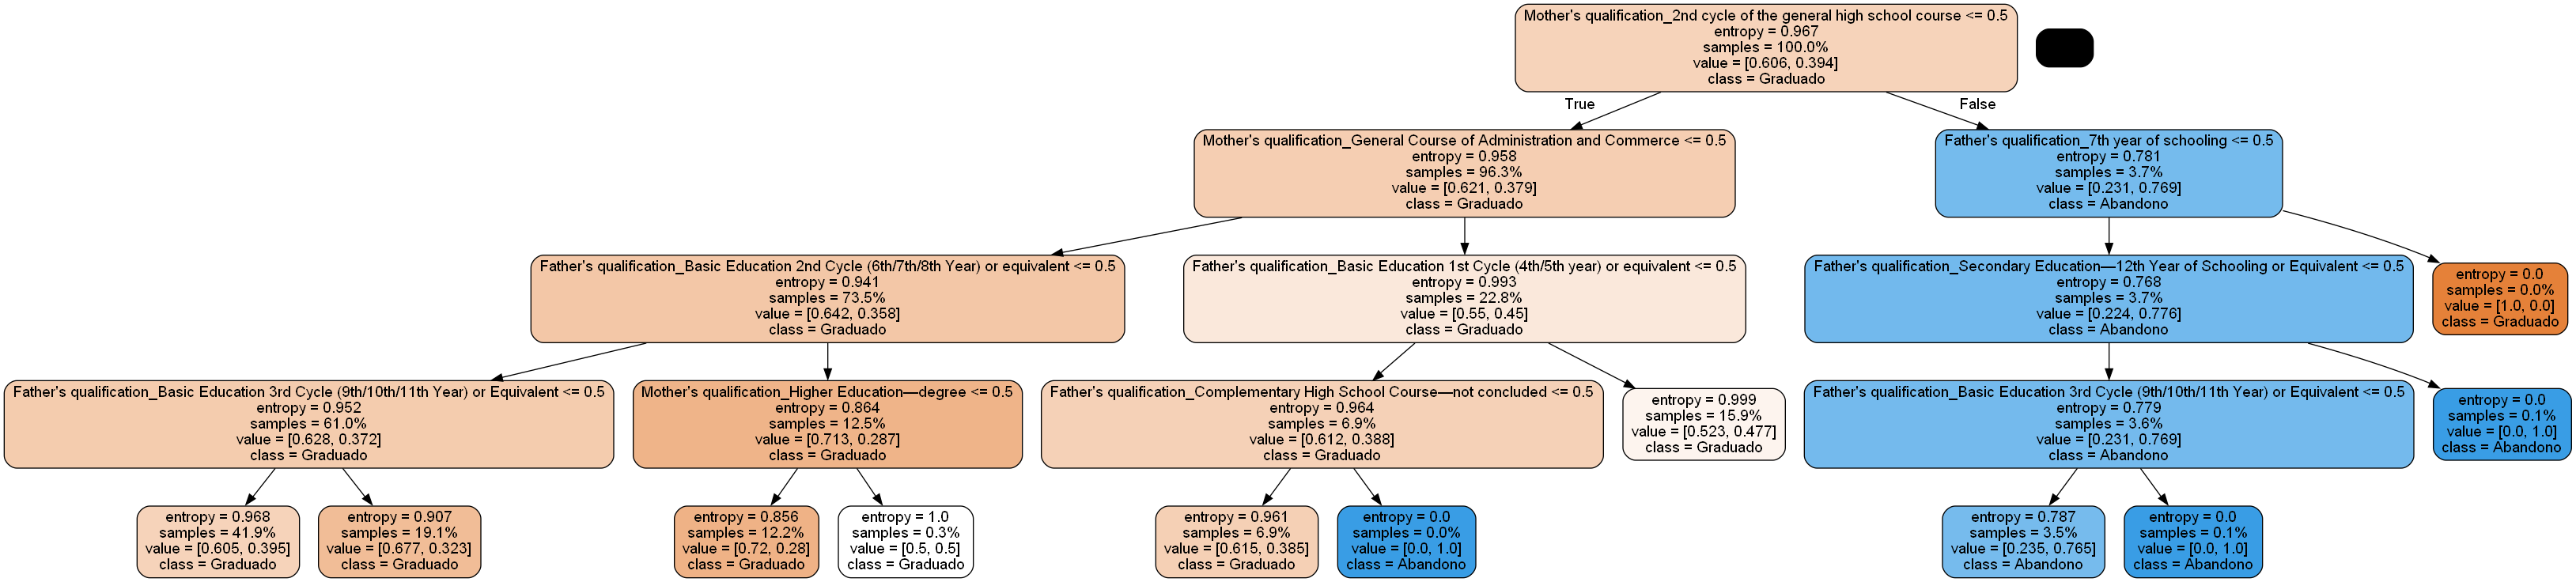

In [642]:
# Visualizar el árbol de Venenosa_e
dot_data_Dropout = StringIO()
export_graphviz(clf_Dropout, out_file=dot_data_Dropout, proportion=True,
                feature_names=list(X_train.columns),
                class_names=['Graduado','Abandono'],
                rounded=True, filled=True)
graph_Dropout = pydot.graph_from_dot_data(dot_data_Dropout.getvalue())
Image(graph_Dropout[0].create_png())

Para poder ver el árbol con más detalle, situar el ratón encima de la esquina superior derecha de la figura anterior y seleccionar la segunda celda "Expand image"

- Selección de reglas que generalicen lo menos posible y en relación con la hipotesis

    Viendo las ramificaciones que ha creado el árbol, podríamos decir que las variables de estudios de los padres no son influyentes. Este se debe a que, en muchos de los casos, tengan o no ese nivel académico, el resultado de los hijos es el mismo.

    Esto lo podemos observar en los siguientes casos:

    - Independientemente de los estudios que tenga la madre, y que el pueda tener o no unos estudios correspondietnes a Basic Education 3rd Cycle (9th/10th/11th Year) or equivalent: (Se gradúan siempre).
    - Sabiendo que madre puede tener o no una educación correspondiete a Higher Education-degree, y que el padre tiene unos estudios correspondietnes a Basic Education 2nd Cycle(6th/7th/8th Year) or equivalent : (Se gradúan siempre).

    Los casos en los que si vemos un cambio dependiendo de los estudios son:

    - Sabiendo que la madre tiene unos estudios correspondientes a General Course of Administration and Commerce, y que el padre no tiene unos estudios correspondientes a 2nd year complementary High School course: (Se gradúan)
    - Sabiendo que la madre tiene unos estudios correspondientes a General Course of Administration and Commerce, y que el padre tiene unos estudios correspondientes a 2nd year complementary High School course: (Abandonan)
    - Sabiendo que la madre tiene unos estudios correspondientes a 2nd cycle of the general High School course y sabiendo que el padre tiene unos estudios correspondientes a 7th year of schooling: (Se gradúan) 
    - Sabiendo que la madre tiene unos estudios correspondientes a 2nd cycle of the general High School course y sabiendo que el padre no tiene unos estudios correspndientes a 7th year of schooling: (Abandonan) 

    Podemos afirmar que estas reglas no siguen un patrón lógico y que no parece que tengan relación alguna.

## 4.4 Teorema de Bayes


A continuación, vamos a  utilizar el teorema de Bayes para evaluar tres casos y comprobar si existe una relación entre el nivel de estudios de los padres y la probabilidad de que sus hijos se gradúen. 
El teorema de Bayes es una herramienta que nos ayuda a  evaluar la relación entre variables y se utiliza en el análisis estadístico.

In [643]:
bayes["Mother's qualification"] = pd.cut(bayes["Mother's qualification"], bins=[-1, 11, 25, bayes["Mother's qualification"].max()], labels=["Bajo", "normal", "Alto"])
bayes["Father's qualification"] = pd.cut(bayes["Father's qualification"], bins=[-1, 11, 25, bayes["Father's qualification"].max()], labels=["Bajo", "normal", "Alto"])
bayes

,Mother's qualification,Father's qualification,Target
0,normal,normal,Dropout
1,normal,Alto,Graduate
2,normal,Bajo,Dropout
3,normal,Bajo,Graduate
4,normal,Bajo,Graduate
...,...,...,...
4419,normal,normal,Graduate
4420,normal,normal,Dropout
4421,normal,Bajo,Dropout
4422,normal,Bajo,Graduate


- Codificación de variables

In [644]:
bayes["Mother's qualification"] = pd.factorize(bayes["Mother's qualification"])[0]
bayes["Father's qualification"] = pd.factorize(bayes["Father's qualification"])[0]
bayes["Target"] = pd.factorize(bayes["Target"])[0]

X = bayes[["Mother's qualification", "Father's qualification"]]
y = bayes[["Target"]]


- División de los datos en los correspondientes datasets

In [645]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [646]:
train_size = np.shape(X_train)[0]
test_size = np.shape(X_test)[0]

print("Cantidad de datos en conjunto de entrenamiento:", train_size)
print("Cantidad de datos en conjunto de prueba:", test_size)

Cantidad de datos en conjunto de entrenamiento: 2904
Cantidad de datos en conjunto de prueba: 726


Text(0.5, 1.0, 'Distribución de datos en conjunto de entrenamiento y prueba')

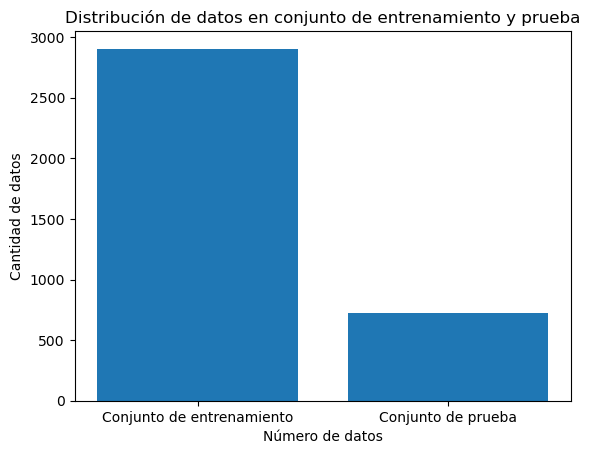

In [647]:
# Crear una lista con la cantidad de datos en cada conjunto
data_sizes = [train_size, test_size]

# Crear una figura con un gráfico de barras
fig, ax = plt.subplots()
ax.bar(['Conjunto de entrenamiento', 'Conjunto de prueba'], data_sizes)

# Agregar etiquetas y título
ax.set_xlabel('Número de datos')
ax.set_ylabel('Cantidad de datos')
ax.set_title('Distribución de datos en conjunto de entrenamiento y prueba')

- Entrenamiento del modelo

In [648]:
# Crear el clasificador Naive Bayes
clf = GaussianNB()

y_train = y_train["Target"].values.ravel()


# Entrenar el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

GaussianNB()

- Evaluación del modelo

In [649]:
# Predecir valores de la variable objetivo usando conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

Exactitud del modelo: 0.59


In [650]:
# Calcular el error de entrenamiento
train_error = mean_squared_error(y_test, y_pred)
print(f"Error para preds_Dropout: {train_error:.2f}")

Error para preds_Dropout: 0.41


Como podemos apreciar, obtenemos una precisión relativamente baja y un error considerablemente alto para este clasificador con estas variables. Esto podría ayudarnos a la hora de decidir si rechazar o no la hipótesis en un futuro.

- Predicción de una si una persona va a graduarse o no

    Vamos a realizar la predicción con 3 casos:
    
    - Si ninguno tiene estudios o son bajos
    - Si la madre tiene nivel de estudios medio y el padre tiene nivel un de estudios bajo
    - Si ambos tienen nivel de estudios alto

In [651]:
#clf.set_params(feature_names=["Mother's qualification", "Father's qualification"])
prediccion = clf.predict([[2,2],[1,2],[0,0]])

Caso = ["Si ninguno tiene estudios o son bajos, ", "Si la madre tiene nivel de estudios medio y el padre tiene nivel un de estudios bajo, ", "Si ambos tienen nivel de estudios alto, "]


for i in range(len(prediccion)):
    if prediccion[i] ==0:
        print(Caso[i],"el estudiante no se gradua")
    elif prediccion[i]==1:
        print(Caso[i],"el estudiante se gradua")

Si ninguno tiene estudios o son bajos,  el estudiante no se gradua
Si la madre tiene nivel de estudios medio y el padre tiene nivel un de estudios bajo,  el estudiante no se gradua
Si ambos tienen nivel de estudios alto,  el estudiante se gradua


## 4.5 Correlación de las variables con la columna "Target"

- Calculamos la correlación utilizando el  coeficiente de Spearman , que es similar al de pearson pero para variables ordinales.

In [652]:
# Seleccionar las columnas para el análisis de correlación
columnas = ["Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Nacionality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP","Target"]

# Calcular la matriz de correlación de Spearman
corr_matrix = correlacion[columnas].corr(method='spearman')

# Imprimir la correlación entre la variable "Target" y las demás variables
print(corr_matrix["Target"])

Marital status                                   -0.119150
Application mode                                 -0.237216
Application order                                 0.107600
Course                                            0.009976
Daytime/evening attendance                        0.084496
Previous qualification                           -0.145996
Nacionality                                       0.005830
Mother's qualification                           -0.028607
Father's qualification                            0.022685
Mother's occupation                               0.036214
Father's occupation                               0.037209
Displaced                                         0.126113
Educational special needs                        -0.007254
Debtor                                           -0.267207
Tuition fees up to date                           0.442138
Gender                                           -0.251955
Scholarship holder                                0.3130

- Mapa de calor

    Para lograr una representación visual más clara, hemos optado por crear un mapa de calor que muestre las variables más relevantes en relación con la columna "Target".

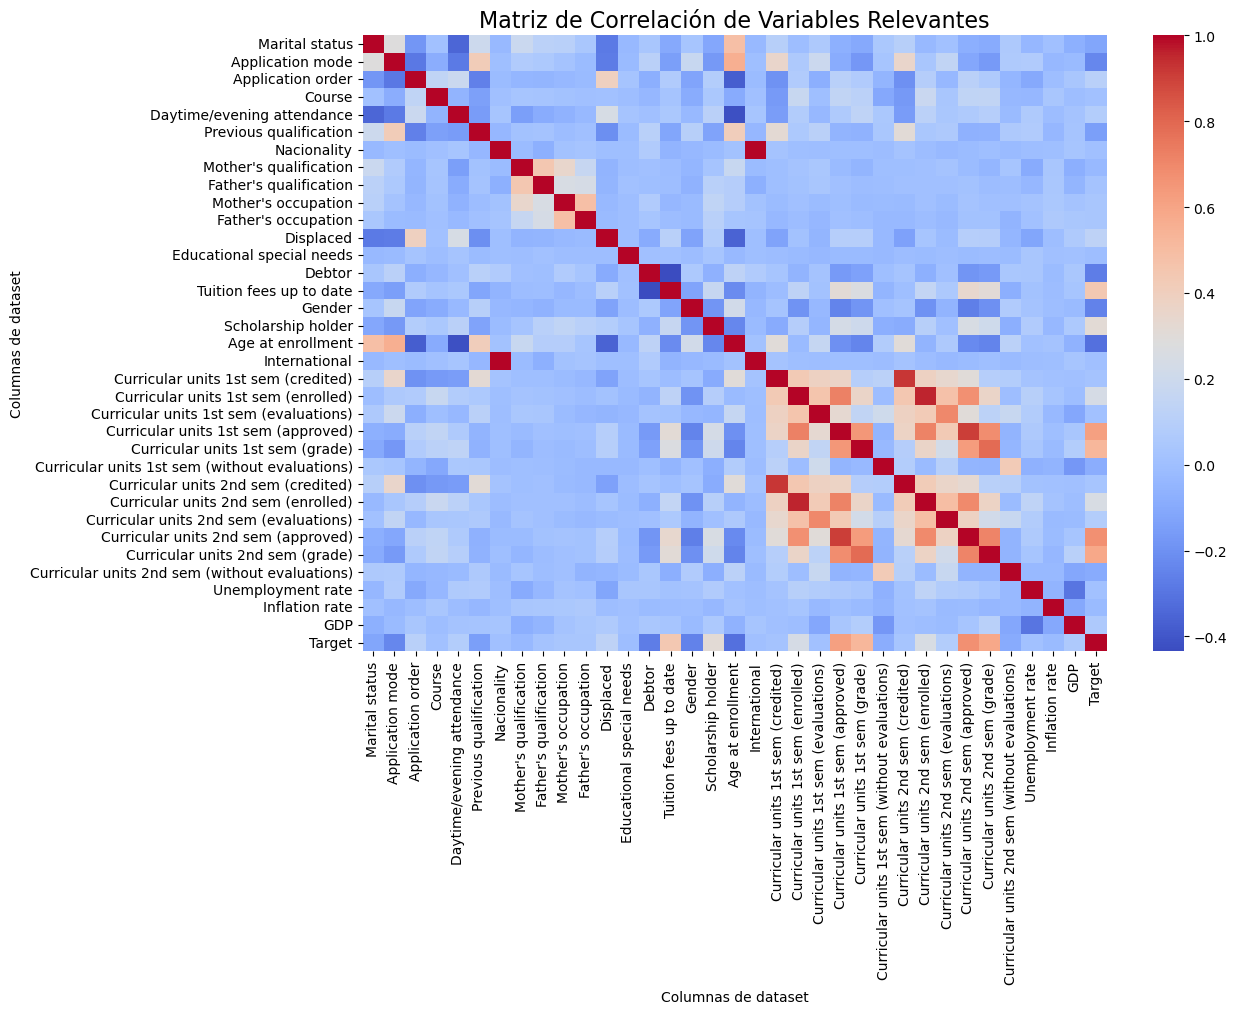

In [653]:
# Seleccoinamos columnas que mas se correlacionan con la variable target y las representamos.
columnas = ["Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Nacionality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP","Target"]
# Calcular la matriz de correlación de Spearman
corr_matrix = correlacion[columnas].corr(method='spearman')

# Visualizar la matriz de correlación con un mapa de calor y título
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title('Matriz de Correlación de Variables Relevantes', fontsize=16)
plt.xlabel('Columnas de dataset')
plt.ylabel('Columnas de dataset')
plt.show()

Como solamente buscamos el nivel de influencia sobra la columna "Target", se ha decidido sacar los valores correspondientes a esta.

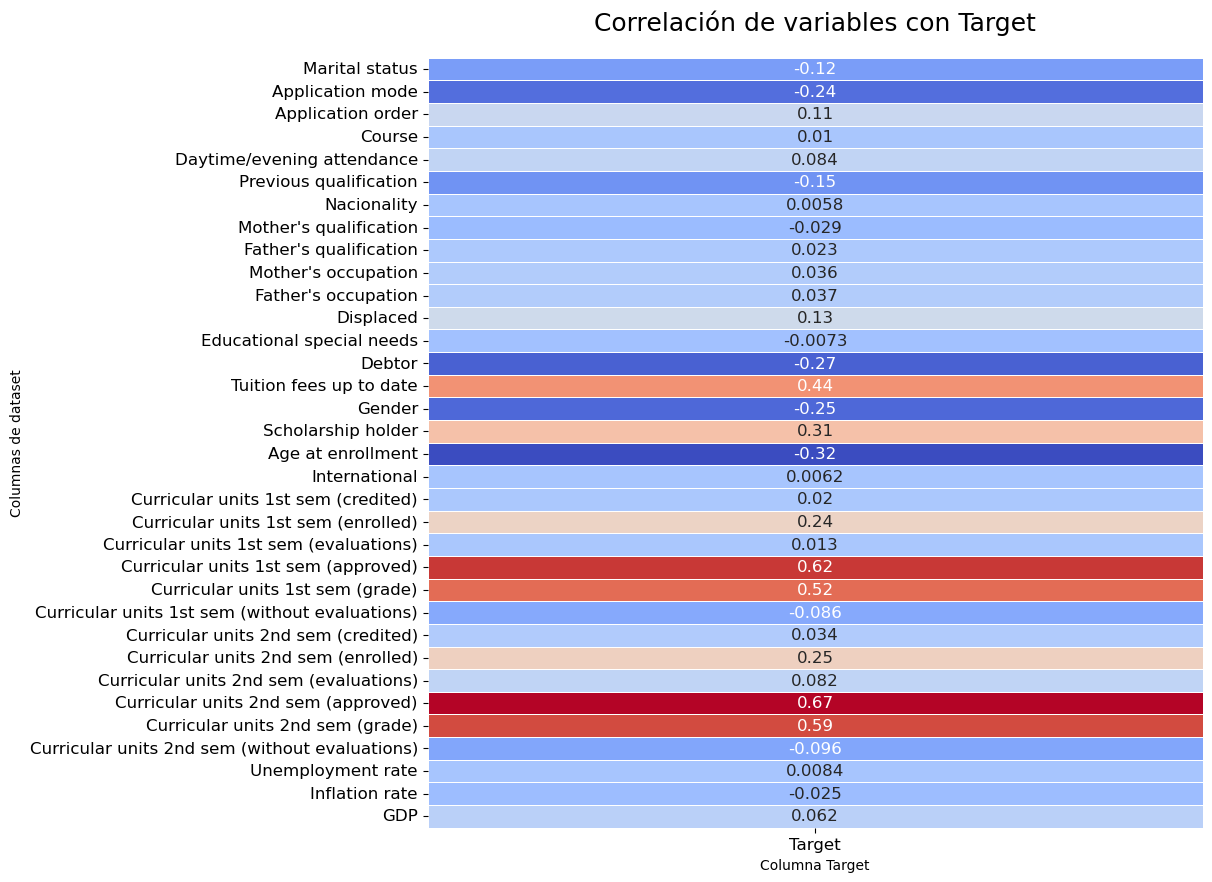

In [654]:
# Seleccionar solo la última columna con los valores de correlación
target_corr = corr_matrix["Target"].iloc[:-1]

# Visualizar la matriz de correlación con un mapa de calor
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap="coolwarm", ax=ax, cbar=False, linewidths=.5, annot_kws={"fontsize":12})
ax.tick_params(axis='both', which='major', labelsize=12, labelrotation=0)
ax.set_title("Correlación de variables con Target", fontsize=18, pad=20)
ax.set_xlabel('Columna Target')
ax.set_ylabel('Columnas de dataset')
plt.show()



- Como podemos apreciar , existe un nivel muy bajo de correlación entre nuestras variables estudios de Padre y Madre con la variable Target que nos indica si abandono o finalizo el alumno el grado universitario.
- Sin embargo las variables asignaturas aprobadas en el primer y segundo cuatrimestre parecen tener un nivel de correlación alto con la variable Target.


## 5. Interpretación y evaluación de los resultados

- Una vez aplicadas las técnicas de Data Mining a nuestro Dataset, desde nuestro grupo deducimos que  no existe una relación directa entre el nivel de estudios de los padres y el éxito académico de sus hijos, aceptando por tanto nuestra hipótesis nula (H0) y concluyendo que no existe una relación significativa entre ambas variables en la población que se está analizando.

- Los resultados obtenidos en los algoritmos utilizados (Apriori, Árbol de decisión,Teorema de Bayes) y en el estudio del nivel de correlación de ambas variables no nos aportan suficientes evidencias como para rechazar nuestra hipotesis nula.

### 5.1 Relación del nivel de estudios de los padres con la variable Target

En este caso, podríamos concluir que no hay una relación significativa entre los estudios de los padres y la tasa de graduación de los estudiantes en la institución estudiada , pues tal y como vemos representado en el siguiente gráfico, no tenemos indicio suficientes de que el nivel de estudios de los padres sea un factor determinante en cuanto al desempeño universitario de los hijos. 

Sin embargo, es importante tener en cuenta que esto solo se aplica a los datos recopilados en este estudio y puede haber otros factores externos que influyan en la relación entre los estudios de los padres y la tasa de graduación en otras instituciones o contextos

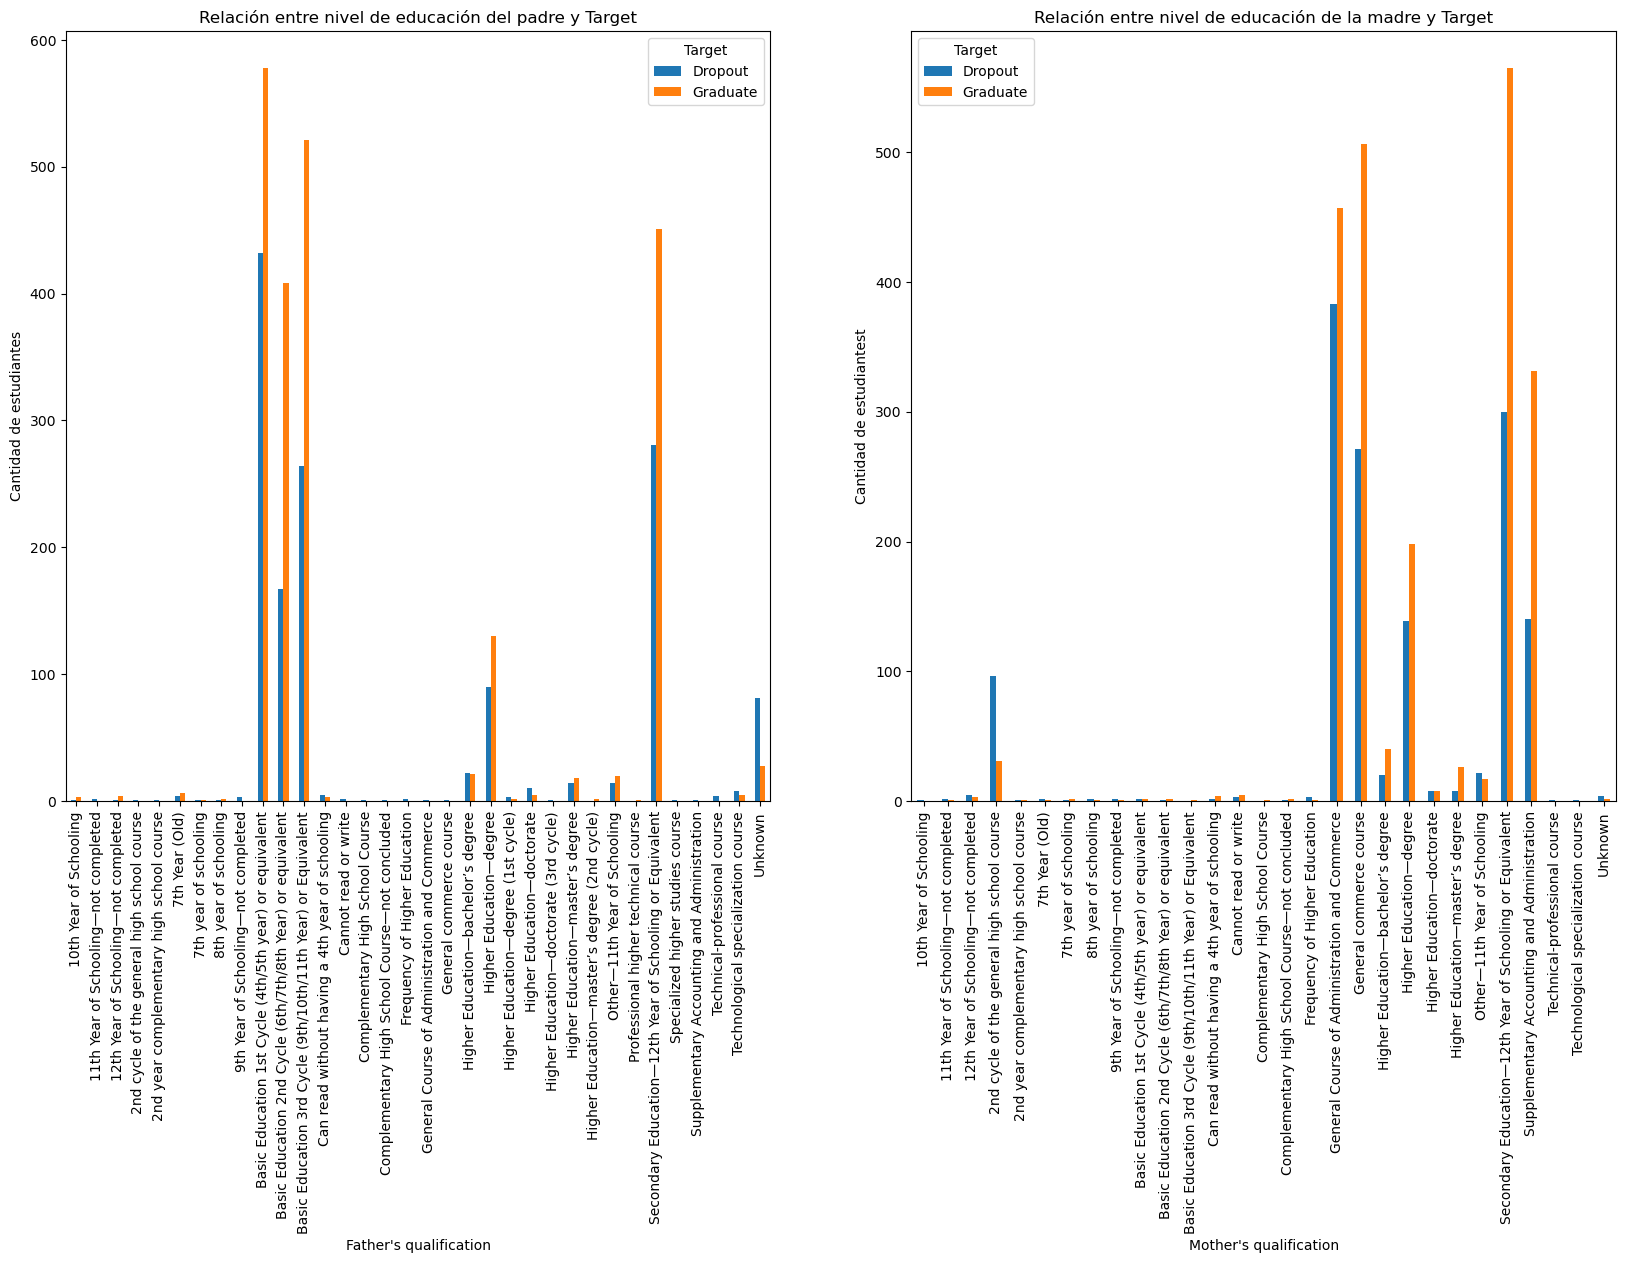

In [655]:
# Crear una tabla de contingencia de graduados y dropouts por nivel de educación del padre y madre
tabla_father = pd.crosstab(index=data["Father's qualification"], columns=data['Target'])
tabla_mother = pd.crosstab(index=data["Mother's qualification"], columns=data['Target'])

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

# Graficar la tabla de contingencia del padre en el primer subplot
ax1 = tabla_father.plot(kind='bar', ax=ax1)
ax1.set_title('Relación entre nivel de educación del padre y Target')
ax1.set_ylabel('Cantidad de estudiantes')

# Graficar la tabla de contingencia de la madre en el segundo subplot
ax2 = tabla_mother.plot(kind='bar', ax=ax2)
ax2.set_title('Relación entre nivel de educación de la madre y Target')
ax2.set_ylabel('Cantidad de estudiantest')

# Mostrar la figura
plt.show()

### 5.2 Representación de la variable más significativa a la hora de ver el éxito de los estudientes en la universidad de Portugal.

- Finalmente, con la información obtenida con la correlación de las variables en función de la variable "Target", tenemos suficientes evidencias para concluir que  el número de asignaturas aprobadas en el segundo cuatrimestre es la variable que más influye en el desempeño universitario de los alumnos.

- La gráfica a continuación muestra la proporción de graduados en función de la variable Curricular units 2nd sem (approved). En esta, se puede observar una tendencia positiva en la que aquellos alumnos que aprobaron un mayor número de asignaturas tienen una mayor probabilidad de graduarse. Este resultado sugiere que el rendimiento académico es un factor clave para el éxito universitario

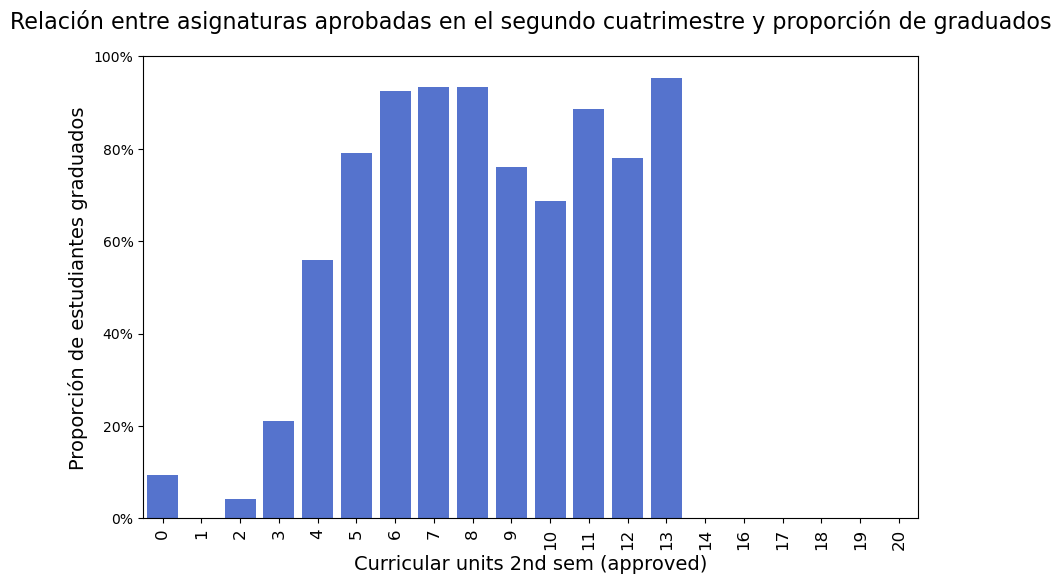

In [661]:
graduados = correlacion[correlacion["Target"] == 1].groupby("Curricular units 2nd sem (approved)").size()
no_graduados = correlacion[correlacion["Target"] == 0].groupby("Curricular units 2nd sem (approved)").size()

proporcion_graduados = graduados / (graduados + no_graduados)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=proporcion_graduados.index, y=proporcion_graduados.values, color='royalblue')
ax.set_xlabel("Curricular units 2nd sem (approved)", fontsize=14)
ax.set_ylabel("Proporción de estudiantes graduados", fontsize=14)
ax.set_xticklabels(proporcion_graduados.index, rotation=90, fontsize=12)
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title("Relación entre asignaturas aprobadas en el segundo cuatrimestre y proporción de graduados", fontsize=16, pad=20)
plt.show()
